In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
x = np.load('C:/Users/david/Documents/0_kul/1_ma_stds_1/1_advanced_analytics/assignment_2/data/processed/image_pixel_100.npy') # loading it
y = pd.read_csv("C:/Users/david/Documents/0_kul/1_ma_stds_1/1_advanced_analytics/assignment_2/data/processed/y.csv",delimiter=',')
print(x.shape,y.shape)
x_interim, x_eval, y_interim, y_eval = train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_test,y_train,y_test = train_test_split(x_interim,y_interim,test_size=0.4,random_state=42)

(11685, 100, 100, 3) (11685, 68)


In [3]:
# import keras library
import keras
# import Sequential from the keras models module
from keras import Sequential
# import Dense, Dropout, Flatten, Conv2D, MaxPooling2D from the keras layers module
from keras.layers import Dense,Flatten, Conv2D
model = Sequential()
# Add a convolutional layer (15 units)
model.add(Conv2D(30,activation='relu',kernel_size=3,input_shape=(100,100,3)))
# Add another convolutional layer (5 units)
model.add(Conv2D(10,activation='relu',kernel_size=3))
# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(68, activation='softmax'))
# Compile model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [4]:
# Fit the model to training data 
model.fit(x_train,y_train, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

Train on 4486 samples, validate on 1122 samples
Epoch 1/3
4486/4486 [==============================] - 70s 16ms/step - loss: 0.4869 - accuracy: 0.9683 - val_loss: 0.4917 - val_accuracy: 0.9680
Epoch 2/3
4486/4486 [==============================] - 76s 17ms/step - loss: 0.4870 - accuracy: 0.9683 - val_loss: 0.4917 - val_accuracy: 0.9680
Epoch 3/3
4486/4486 [==============================] - 76s 17ms/step - loss: 0.4870 - accuracy: 0.9683 - val_loss: 0.4917 - val_accuracy: 0.9680


In [5]:
# Evaluate the model on test data
model.evaluate(x_test,y_test, batch_size=10)

3740/3740 [==============================] - 5s 1ms/step


[0.4934673484235524, 0.9678440690040588]

In [4]:
from keras.models import model_from_json

In [5]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


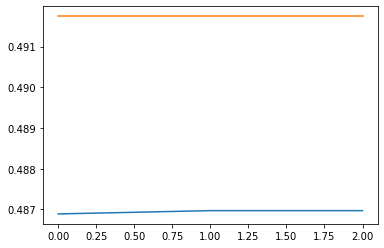

In [5]:
#Plot the learning curves
import matplotlib.pyplot as plt
# Extract the history from the training object
history = model.history
# Plot the training loss 
plt.plot(history.history['loss'])
# Plot the validation loss
plt.plot(history.history['val_loss'])
# Show the figure
plt.show()

In [6]:
x_test.shape

(3740, 100, 100, 3)

In [7]:
model.predict(x_test[0:1])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [8]:
model.predict_classes(x_test[0:2000])

array([47, 47, 47, ..., 47, 47, 47], dtype=int64)

In [9]:
y.iloc[:,59:61]

,tag_sweet_concept,tag_vegetarian_concept
0,0,0
1,0,1
2,0,0
3,0,0
4,1,0
...,...,...
11680,0,0
11681,0,0
11682,0,0
11683,0,0
